# Problem Set 1 CS129.18

The following problem set will revolve around hourly Philippine weather data observations from 1978 to 2018 sourced from NOAA (National Oceanic and Atmospheric Administration). 

The dataset `PH_Weather_v1.csv` has **11** columns. The columns are described as follows.

* **datetime** maps to a YYYYMMDDSSSS string datetime format.
* **wind_direction** represents the recorded compass direction of the wind. 
* **wind_speed** is the wind speed recorded in MPH.
* **gust_speed** is the gust speed recorded in MPH. NAN if no recording.
* **sea_level_pressure** is sea level pressure in millibars estimated to the nearest tenth.
* **temperature** is the recorded temperature in celsius.
* **altitude** is the station altimeter recording in inches. NAN if no recording.
* **precipitation** is the station hourly precipitation report in inches. NAN if no recording.
* **clouds** is the station observed cloud report.
    * CLR-CLEAR 
    * SCT-SCATTERED
    * BKN-BROKEN
    * OVC-OVERCAST, 
    * OBS-OBSCURED
    * POB-PARTIAL OBSCURATION 
* **visibility** is the station observed visibility in miles
* **humidity** is the station observed relative humidity

## Requirements


>Atmospheric Science is a complex system that works with factors that interact with each other. We might be able use these variables to estimate the value of one of the key indicators: Temperature.

Using the lessons on Linear Regression I and II, and the other resource notebooks, show the following in this Jupyter Notebook.

Write your answers down as Markdown cells or comments in the code.

1. What is the dimensionality or shape of the data? ( 1pt )

2. What is mean temperature for the year 2017? ( 3pts )

3. Solve for the beta coefficients for the columns that you can use in your dataset to predict temperature. ( 4pts )

4. Show the relationship between the variable with the highest beta coefficient and temperature (Use a plot). ( 5pts )

5. Solve for the Mean Squared Error of your predicted temperature against the actual temperature. ( 2pts )

6. Solve for the R^2 score of the linear model used to predict temperature. ( 2pts )

7. Identify if the model is a good model and why. ( 3pts )



-----



# Exploration Data Analysis Assignment 2
#### Mannix Tapawan - MLE

In [3]:
#Preamble
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.width', 5000)
pd.set_option('display.max_columns', 60)

plt.rcParams['figure.figsize'] = (15, 5)

In [4]:
# Assign the weather data to a dataframe object
df = pd.read_csv('/home/mannix/stint2/ass/apper-eda/Notebooks/data/PH_Weather_v1.csv')

### 1. What is the dimensionality or shape of the data? 

In [5]:
#Gets the shape of dataframe
df.shape

(90565, 11)

#### <b>Answer</b>: The data has 11 columns and 90565 rows

### 2. What is mean temperature for the year 2017?

In [6]:
#Converts datetime column to datetime format
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y%m%d%H%M')

#Save the 2017 data to df_2017
df_2017 = df[(df['datetime'] >= '2017-01-01') & (df['datetime'] <= '2017-12-31')]

#Compute the average temperature for year 2017
mean_temp_2017 = np.mean(df_2017['temperature'])
mean_temp_2017

27.93734856351679

#### <b>Answer</b>: 27.93734856351679 °C

### 3. Solve for the beta coefficients for the columns that you can use in your dataset to predict temperature

In [7]:
df['gust_speed'].value_counts()
#Check if there are significant number of data that has gust_speed values

46.0    1
Name: gust_speed, dtype: int64

In [8]:
df['altitude'].value_counts()
#Check if there are significant number of data that has altitude values

Series([], Name: altitude, dtype: int64)

In [9]:
df['precipitation'].value_counts()
#Check if there are significant number of data that has gust_speed values

0.04    6
0.28    2
1.14    1
0.87    1
0.35    1
0.08    1
0.24    1
Name: precipitation, dtype: int64

In [10]:
from sklearn.linear_model import LinearRegression

X = df.drop(['temperature', 'clouds', 'gust_speed', 'altitude', 'datetime', 'precipitation'], axis=1)
'''Dropped Columns:
    temperature - data to be predicted
    clouds - not integer or float values
    gust_speed - mostly NaN values
    altitude - mostly NaN values
    precipitation - mostly NaN values
    datetime - date and time values
    '''
#Drop the none number values
X = X.dropna()
X.shape

(90565, 5)

In [11]:
linear_model = LinearRegression()
linear_model.fit(X, df['temperature'])

LinearRegression()

In [12]:
#Get the beta coefficients of the used parameters
linear_model.coef_

array([ 1.71087930e-03,  8.67328153e-02, -7.51863858e-05,  1.04275731e-01,
       -1.08646627e+01])

In [13]:
pd.DataFrame(list(zip(X.columns, linear_model.coef_)))

,0,1
0,wind_direction,0.001711
1,wind_speed,0.086733
2,sea_level_pressure,-0.000075
3,visibility,0.104276
4,humidity,-10.864663


####  <b>Answer</b>: Above table (Column 0 - Parameter, Column 1 - Beta Coefficient)

### 4. Show the relationship between the variable with the highest beta coefficient and temperature(Use a plot).

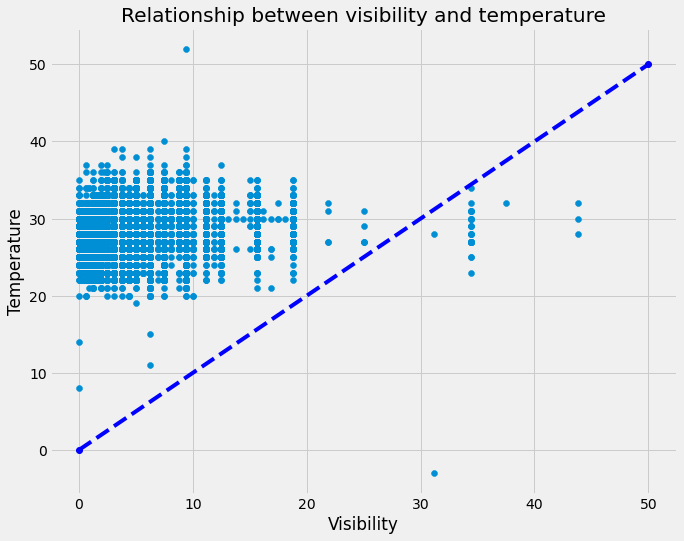

In [14]:
#Set up graph parameters
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 8))
plt.title('Relationship between visibility and temperature')
plt.xlabel('Visibility')
plt.ylabel('Temperature')
plt.plot([0, 50], [0, 50], '--bo')

#Plot visibility and temperature data
plt.scatter(df['visibility'], df['temperature'])

### 5. Solve for the Mean Squared Error of your predicted temperature against the actual temperature.

In [15]:
predictions = linear_model.predict(X)

#Adds prediction column with the predicted temperature values
df['prediction'] = predictions

df[['temperature', 'prediction']].head(5)

,temperature,prediction
0,30,28.612678
1,26,25.120723
2,26,28.038829
3,26,29.079458
4,26,26.294072


In [16]:
#Get the value of Mean Squared Score
mean_squared_error = np.mean((df['temperature'] - predictions)**2)
mean_squared_error

2.7693205361763495

####  <b>Answer</b>: Mean Squared Error = 2.7693205361763495

### 6. Solve for the R^2 score of the linear model used to predict the temperature.

In [17]:
#Get the value of R-Squared Score
linear_model.score(X, df['temperature'])

0.4725183330039757

#### <b>Answer</b>: R Squared Score = 0.4725183330039757

### 7. Identify if the model is a good model and why?

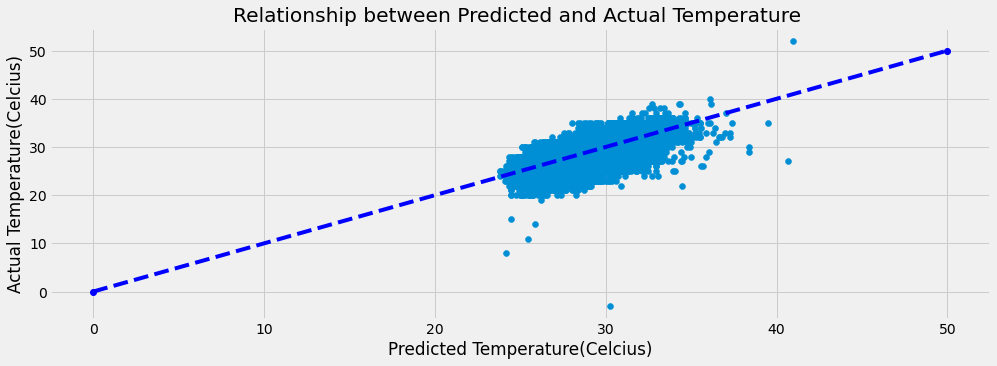

In [18]:
#Set up graph parameters
plt.title('Relationship between Predicted and Actual Temperature ')
plt.xlabel('Predicted Temperature(Celcius)')
plt.ylabel('Actual Temperature(Celcius)')
plt.plot([0, 50], [0, 50], '--bo')

#Plot actual and predicted temperature data
plt.scatter(df['prediction'], df['temperature'])

#### <b>Answer</b>: Although we got a low R-Squared Score (0.4725), we can see in the graph above that the points are randomly scattered between 20 and 40, this indicates that the model is a good fit.